In [13]:
pip install yfinance

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.animation import FuncAnimation
from itertools import count


In [15]:
msft = yf.Ticker("MSFT")
info = msft.info
df = pd.DataFrame.from_dict(info, orient='index', columns=['value'])
df.head(20)

,value
zip,98052-6399
sector,Technology
fullTimeEmployees,163000
longBusinessSummary,"Microsoft Corporation develops, licenses, and ..."
city,Redmond
phone,425 882 8080
state,WA
country,United States
companyOfficers,[]
website,http://www.microsoft.com


In [36]:
#tabela kursów historycznych
hist = msft.history(period="max")

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056238,0.064508,0.056238,0.061751,1031788800,0.0,0.0
1986-03-14,0.061751,0.065059,0.061751,0.063956,308160000,0.0,0.0
1986-03-17,0.063956,0.065610,0.063956,0.065059,133171200,0.0,0.0
1986-03-18,0.065059,0.065610,0.062853,0.063405,67766400,0.0,0.0
1986-03-19,0.063405,0.063956,0.061751,0.062302,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-03,253.399994,254.350006,251.119995,251.860001,19626600,0.0,0.0
2021-05-04,250.970001,251.210007,245.759995,247.789993,32756100,0.0,0.0
2021-05-05,249.059998,249.500000,245.820007,246.470001,21901300,0.0,0.0


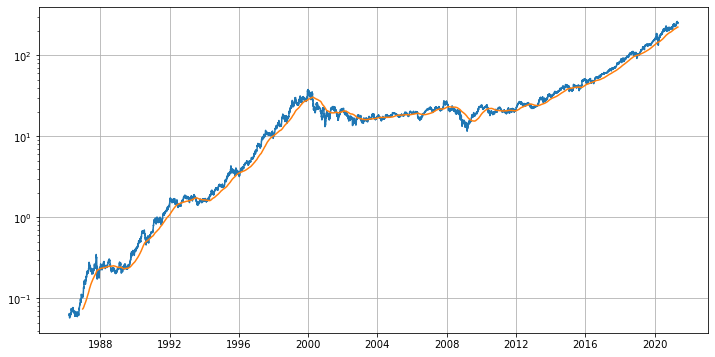

In [19]:
#średnia 200-sesyjna
hist = msft.history(period="max")
x = hist.index
y1 = hist["Close"]
y2 = y.rolling(200).mean()
plt.figure(figsize=(12, 6))
plt.plot(x,y1, y2)
plt.yscale('log')
plt.grid(True)
plt.show()


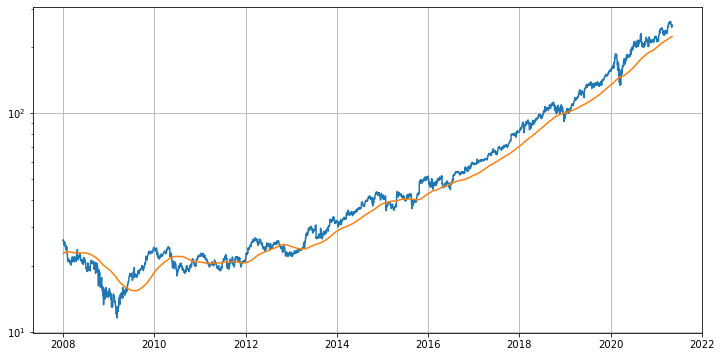

In [20]:
#wykres przefiltrowany od 2008 200 wynikow

m = 200
year = 2008

hist = msft.history(period="max")
x = hist.index #data
y1 = hist["Close"] #close
y2 = y1.rolling(m).mean() #średnia 200 wyników

filt = hist.index >= dt.datetime(year, 1, 1)
# hist = hist[filt]
x = x[filt]
y1 = y1[filt]
y2 = y2[filt]

plt.figure(figsize=(12, 6))
plt.plot(x, y1, y2)
plt.yscale('log')
plt.grid(True)
plt.show()

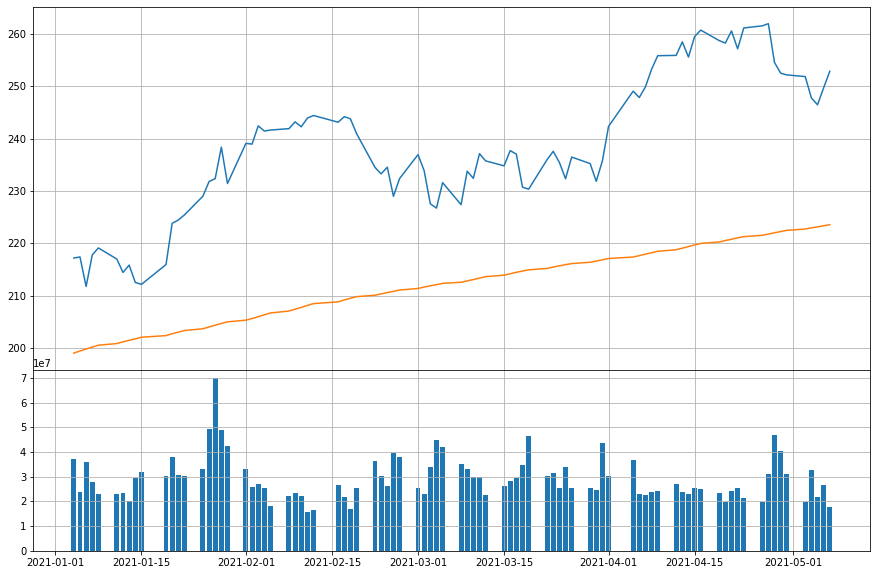

In [21]:
#wykres przefiltrowany od 2008 200 wynikow z volume i średnią m-sesyjną
from matplotlib import gridspec
m = 200
year = 2021

hist = msft.history(period="max")
x = hist.index #data
y1 = hist["Close"] #close
y2 = y1.rolling(m).mean() #średnia 200 wyników
vol = hist["Volume"]

filt = hist.index >= dt.datetime(year, 1, 1)
# hist = hist[filt]
x = x[filt]
y1 = y1[filt]
y2 = y2[filt]
vol = vol[filt]

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((3,1), (0, 0), rowspan = 2, colspan = 1)
ax2 = plt.subplot2grid((3,1), (2, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(x, y1, y2)
ax1.grid(True)

ax2.bar(x, vol)
ax2.grid(True)

# fig.tight_layout() #ściśnięcie wykresu
# ax1.axes.xaxis.set_ticklabels([])
plt.setp(ax1.get_xticklabels(), visible = False)
plt.subplots_adjust(hspace=0) #ściśnięcie wykresów
plt.show()

In [34]:
# Wyświetlanie w czasie rzeczywistym co sekundę ostatniego kursu akcji

# pobierana jest najmniejsza możliwa paczka danych (z ostatniego dnia co minutę) i pobierany jest z niej ostatni kurs
import time as t

def current_price(tic):
    currentprice = yf.download(tickers=tic, period="1d", interval="1m")
    lastelement = currentprice["Close"].iloc[-1] #ostatni element dataframe
    return lastelement

# print('\n' in current_price("MSFT"))

for time in range(10):
    print(current_price("MSFT"))
    t.sleep(1)
    
    
    #poszukać jak wyświetlać dane co sekundę na wykresie w matplotlibie
#   jak usunąć 100%...


[*********************100%***********************]  1 of 1 completed
252.69000244140625
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672
[*********************100%***********************]  1 of 1 completed
252.7100067138672


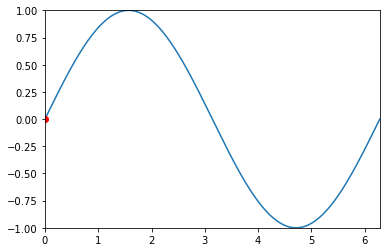

In [11]:
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
# wypróbowany ten przykład animacji, w jupiterze nie działa ta animacja

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()